In [2]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from functions import *

# Allow image embeding in notebook
%matplotlib inline

Load in the data, and give each image a label based on their directory

In [3]:
# Load training and testing datasets.
ROOT_PATH = "traffic"
train_data_dir = os.path.join(ROOT_PATH, "datasets/BelgiumTS/Training")
test_data_dir = os.path.join(ROOT_PATH, "datasets/BelgiumTS/Testing")

images, labels = load_data(train_data_dir)

In [3]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


In [4]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (144, 141, 3), min: 3, max: 255
shape: (183, 187, 3), min: 0, max: 255
shape: (244, 253, 3), min: 0, max: 255
shape: (99, 97, 3), min: 4, max: 247
shape: (145, 146, 3), min: 0, max: 255


In [5]:
# Resize images to 32x32 and make sure they are still identifiable
images32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in images]

/Users/michael/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [6]:
# Resize images to 32x32 and make sure they are still identifiable
images32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in images]

/Users/michael/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Grey Scaling Images

In [7]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images32 = np.array(images32)

# Convert `images28` to grayscale
images32 = rgb2gray(images32)

In [8]:
for image in images32[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32), min: 0.08305321384803917, max: 0.9743512454044114
shape: (32, 32), min: 0.047351806736366325, max: 1.0
shape: (32, 32), min: 0.04981392195159318, max: 0.9941346875000001
shape: (32, 32), min: 0.09822936140471811, max: 0.9065299243642784
shape: (32, 32), min: 0.06366530407475514, max: 1.0


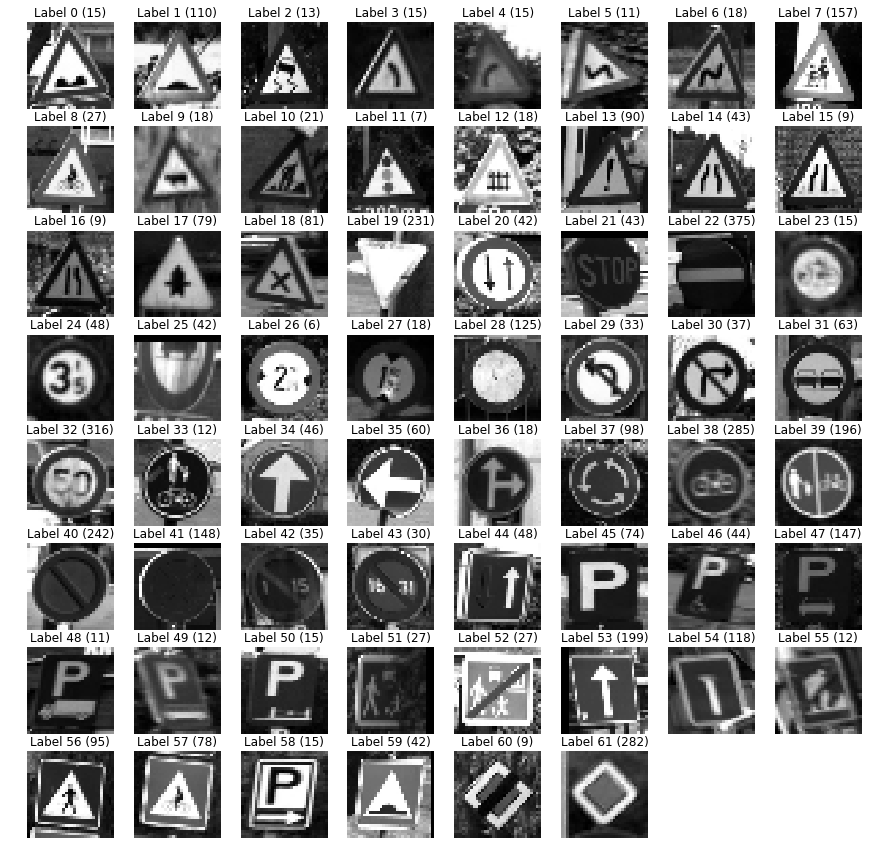

In [9]:
display_images_and_labels(images32, labels)

In [10]:
for image in images32[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32), min: 0.08305321384803917, max: 0.9743512454044114
shape: (32, 32), min: 0.047351806736366325, max: 1.0
shape: (32, 32), min: 0.04981392195159318, max: 0.9941346875000001
shape: (32, 32), min: 0.09822936140471811, max: 0.9065299243642784
shape: (32, 32), min: 0.06366530407475514, max: 1.0


Building the Model

In [12]:
labels_a = np.array(labels)
images_a = np.array(images32)
print("labels: ", labels_a.shape, "\nimages: ", images_a.shape)

labels:  (4575,) 
images:  (4575, 32, 32)


In [13]:
# Create a graph to hold the model.
graph = tf.Graph()

# Create model in the graph.
with graph.as_default():
    # Placeholders for inputs and labels.
    images_ph = tf.placeholder(tf.float32, [None, 32, 32])
    labels_ph = tf.placeholder(tf.int32, [None])

    # Flatten input from: [None, height, width, channels]
    # To: [None, height * width * channels] == [None, 3072]
    images_flat = tf.contrib.layers.flatten(images_ph)

    # Fully connected layer. 
    # Generates logits of size [None, 62]
    logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

    # Convert logits to label indexes (int).
    # Shape [None], which is a 1D vector of length == batch_size.
    predicted_labels = tf.argmax(logits, 1)

    # Define the loss function. 
    # Cross-entropy is a good choice for classification.
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))

    # Create training op.
    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # And, finally, an initialization op to execute before training.
    init = tf.global_variables_initializer()

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", predicted_labels)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 1024), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


Training

In [14]:
# Create a session to run the graph we created.
session = tf.Session(graph=graph)

# First step is always to initialize all variables. 
# We don't care about the return value, though. It's None.
_ = session.run([init])

In [15]:
for i in range(201):
    _, loss_value = session.run([train, loss], 
                                feed_dict={images_ph: images_a, labels_ph: labels_a})
    if i % 10 == 0:
        print("Loss: ", loss_value)

Loss:  4.233224
Loss:  3.4412901
Loss:  3.0824955
Loss:  2.7788715
Loss:  2.5513914
Loss:  2.3789084
Loss:  2.2463999
Loss:  2.142329
Loss:  2.0579116
Loss:  1.9876727
Loss:  1.927885
Loss:  1.876026
Loss:  1.8304385
Loss:  1.789874
Loss:  1.7534348
Loss:  1.7203184
Loss:  1.6899955
Loss:  1.6621178
Loss:  1.6363668
Loss:  1.6124669
Loss:  1.5901986


In [16]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: sample_images})[0]
print(sample_labels)
print(predicted)

[40, 56, 38, 61, 7, 32, 53, 28, 40, 32]
[41 56 38 61  7 32 53 61 40 32]


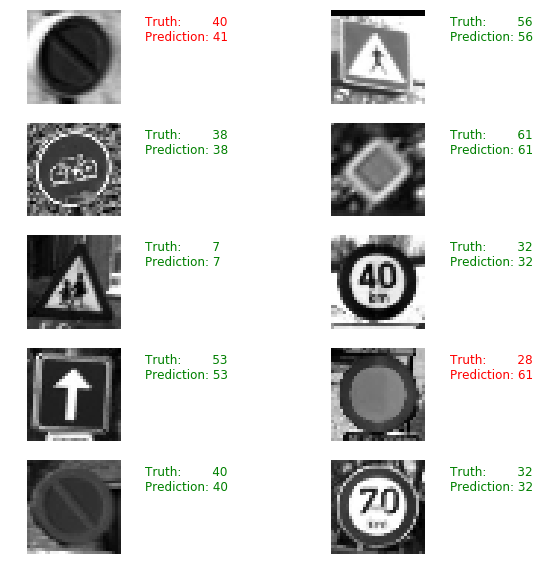

In [18]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap = "gray")

# Testing Grayscaled Images
Greyscale test images and display them

In [26]:
# Load the test dataset.
test_images, test_labels = load_data(test_data_dir)

In [27]:
test_images32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                 for image in test_images]

/Users/michael/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [28]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
test_images32 = np.array(test_images32)

# Convert `images28` to grayscale
test_images32 = rgb2gray(test_images32)

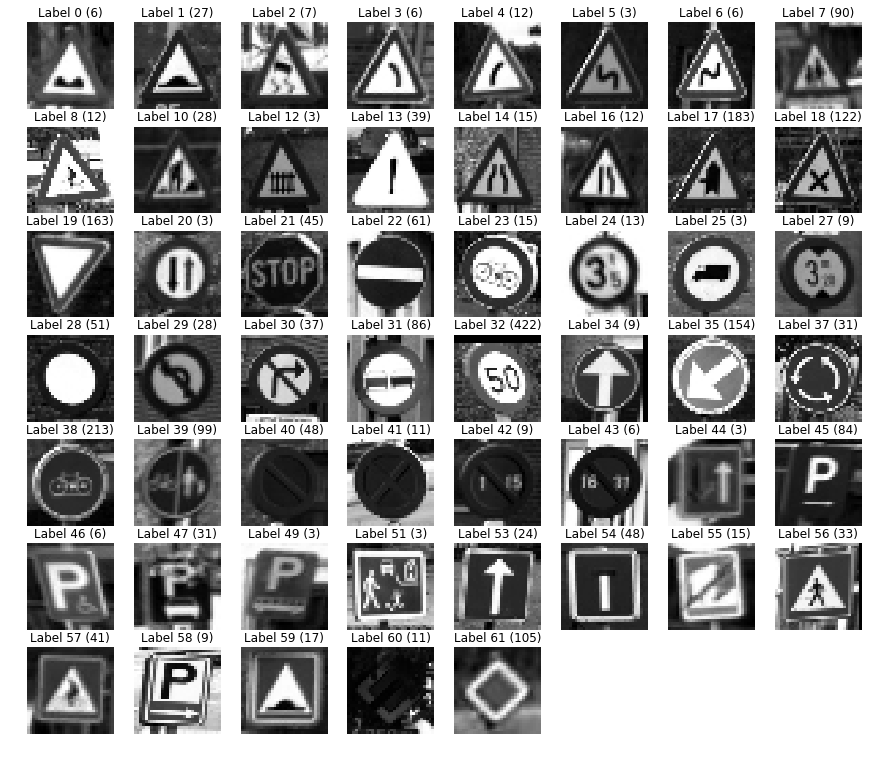

In [29]:
display_images_and_labels(test_images32, test_labels)

In [30]:
# Run predictions against the full test set.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: test_images32})[0]
# Calculate how many matches we got.
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
accuracy = match_count / len(test_labels)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.694
